### MORENO PUENTE EMILIA CRISTINA

TALLER MINIMOS CUADRADOS

Codigo con lo sacado manual en clase

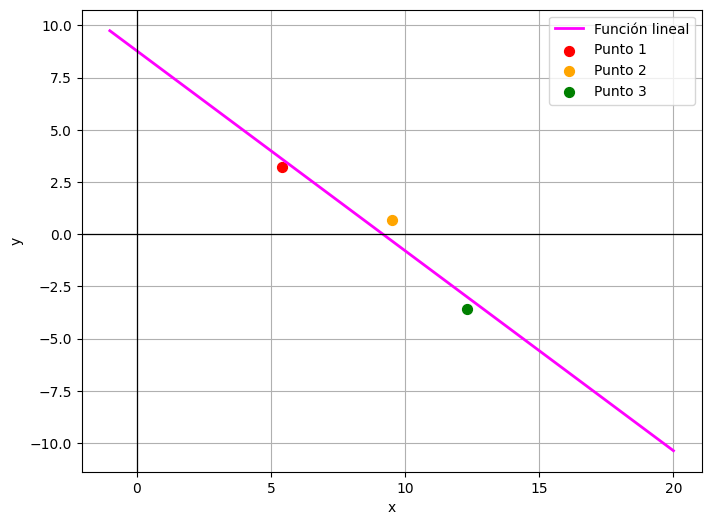

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math

m = -0.9578
b = 8.784

def funcionlineal(x):
    return m*x + b

x = np.linspace(-1, 20, 200)

# Puntos dados
x0, y0 = 5.4, 3.2
x1, y1 = 9.5, 0.7
x2, y2 = 12.3, -3.6

plt.figure(figsize=(8,6))

# Recta
plt.plot(x, funcionlineal(x), label='Función lineal', color='#FF00FF', linewidth=2)

# Puntos
plt.scatter(x0, y0, color='red', s=50, label='Punto 1')
plt.scatter(x1, y1, color='orange', s=50, label='Punto 2')
plt.scatter(x2, y2, color='green', s=50, label='Punto 3')

plt.axvline(0, color='black', linewidth=0.9)
plt.axhline(0, color='black', linewidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Con la libreria

In [31]:
import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable
logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

[12-15 21:22:50][INFO] emore| 2025-12-15 21:22:50.824707


[12-15 21:22:54][INFO] Se ajustarán 2 parámetros.
m: -0.9577913091613628, b: 8.783974536396357


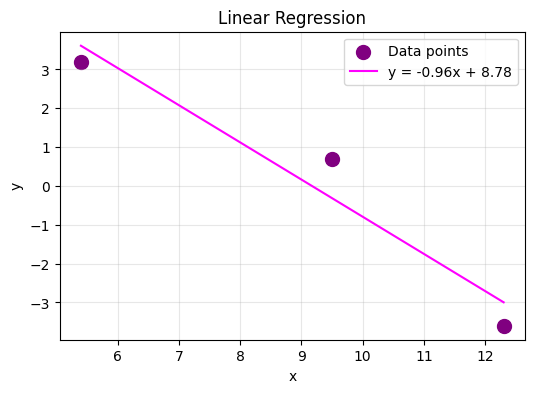

In [32]:

import numpy as np

import matplotlib.pyplot as plt

# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

m, b = ajustar_min_cuadrados(
    xs=[5.4, 9.5, 12.3], ys=[3.2, 0.7, -3.6], gradiente=[der_parcial_1, der_parcial_0]
)
print(f"m: {m}, b: {b}")

xs = [5.4, 9.5, 12.3]
ys = [3.2, 0.7, -3.6]

# Create the plot
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="purple", label="Data points", s=100)

# Plot the fitted line
x_line = np.linspace(min(xs), max(xs), 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color="#FF00FF", label=f"y = {m:.2f}x + {b:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

2do Bloque de Puntos

[12-15 21:22:59][INFO] Se ajustarán 2 parámetros.
m: -0.503232585436377, b: 1.4991976183166862


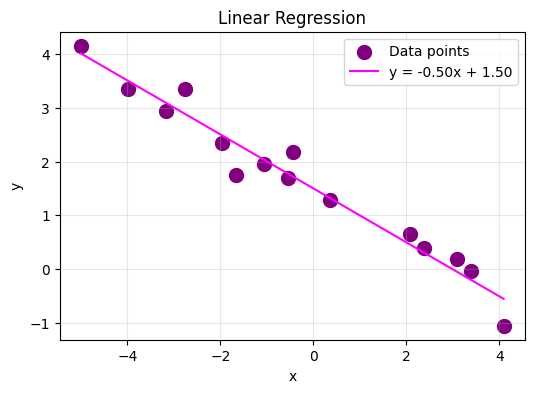

In [33]:
m, b = ajustar_min_cuadrados(
    xs=[3.38, 0.35, 2.07, -0.45, -0.55, -1.06, -2.77, 3.08, -3.98, -5,
        -3.18, -1.96, 2.37, -1.66, 4.09],
    ys=[-0.04, 1.28, 0.65, 2.18, 1.70, 1.96, 3.36, 0.18, 3.35, 4.16,
        2.95, 2.34, 0.38, 1.75, -1.06],
    gradiente=[der_parcial_1, der_parcial_0]
)

print(f"m: {m}, b: {b}")

xs = [3.38,
0.35,
2.07,
-0.45,
-0.55,
-1.06,
-2.77,
3.08,
-3.98,
-5, 
-3.18,
-1.96,
2.37,
-1.66,
4.09]
ys = [-0.04,
1.28,
0.65,
2.18,
1.70,
1.96,
3.36,
0.18,
3.35,
4.16,
2.95,
2.34,
0.38,
1.75,
-1.06]

# Create the plot
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="purple", label="Data points", s=100)

# Plot the fitted line
x_line = np.linspace(min(xs), max(xs), 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color="#FF00FF", label=f"y = {m:.2f}x + {b:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

3cer Conjunto de Datos

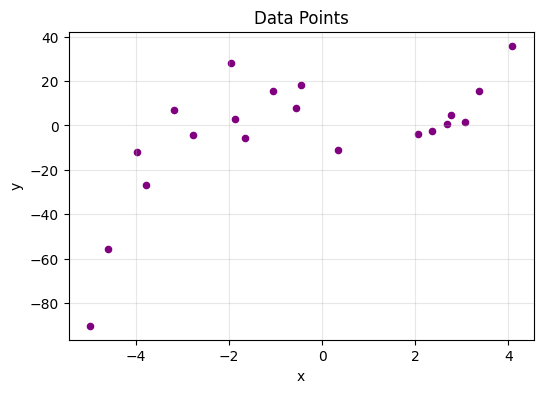

[12-15 21:23:21][INFO] Se ajustarán 2 parámetros.
m: 5.686665564419458, b: -0.8375472244037535


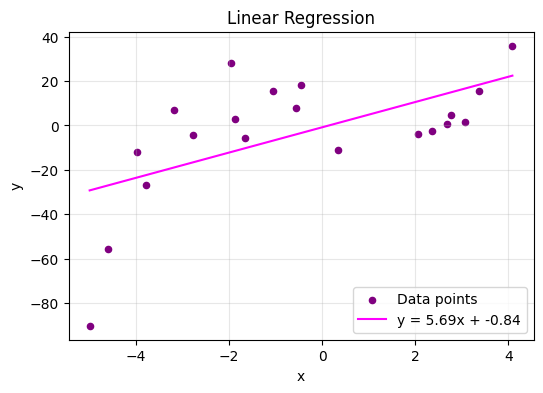

In [36]:
xs = [
    3.38,
    0.35,
    2.07,
    -0.45,
    -0.56,
    -1.06,
    -2.78,
    3.08,
    -3.99,
    -5.00,
    -3.18,
    -1.97,
    2.37,
    -1.67,
    4.09,
    -4.60,
    2.68,
    2.78,
    -3.79,
    -1.87,
]
ys = [
    15.65,
    -11.20,
    -4.00,
    18.03,
    7.94,
    15.32,
    -4.40,
    1.39,
    -11.92,
    -90.24,
    6.92,
    28.35,
    -2.41,
    -5.47,
    35.91,
    -55.53,
    0.77,
    4.79,
    -27.05,
    2.85,
]
plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color="purple", s=20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points")
plt.grid(True, alpha=0.3)
plt.show()

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_1, der_parcial_0])
print(f"m: {m}, b: {b}")

plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="purple", label="Data points", s=20)

# Plot the fitted line
x_line = np.linspace(min(xs), max(xs), 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color="#FF00FF", label=f"y = {m:.2f}x + {b:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Con cubica

In [37]:


def der_parcial_a(xs: list, ys: list) -> tuple[float, float, float, float, float]:

    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += (xi**3) * yi

        # coeficiente del parámetro 3
        c_3 += xi**6
        
        # coeficiente del parámetro 2
        c_2 += xi**5
        
        # coeficiente del parámetro 1
        c_1 += xi**4

        # coeficiente del parámetro 0
        c_0 += xi**3

    return (c_3, c_2, c_1, c_0, c_ind)




def der_parcial_b(xs: list, ys: list) -> tuple[float, float, float, float, float]:
    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += (xi**2) * yi

        # coeficiente del parámetro 3
        c_3 += xi**5
        
        # coeficiente del parámetro 2
        c_2 += xi**4
        
        # coeficiente del parámetro 1
        c_1 += xi**3

        # coeficiente del parámetro 0
        c_0 += xi**2

    return (c_3, c_2, c_1, c_0, c_ind)



def der_parcial_c(xs: list, ys: list) -> tuple[float, float, float, float, float]:

    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += (xi) * yi

        # coeficiente del parámetro 3
        c_3 += xi**4
        
        # coeficiente del parámetro 2
        c_2 += xi**3
        
        # coeficiente del parámetro 1
        c_1 += xi**2

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_3, c_2, c_1, c_0, c_ind)

def der_parcial_d(xs: list, ys: list) -> tuple[float, float, float, float, float]:

    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi

        # coeficiente del parámetro 3
        c_3 += xi**3
        
        # coeficiente del parámetro 2
        c_2 += xi**2
        
        # coeficiente del parámetro 1
        c_1 += xi

        # coeficiente del parámetro 0
        c_0 += 1

    return (c_3, c_2, c_1, c_0, c_ind)

[12-15 21:23:31][INFO] Se ajustarán 4 parámetros.
a: 1.044977916824699, b: 0.03132740575354229, c: -8.88066397007552, d: 2.762289919876911


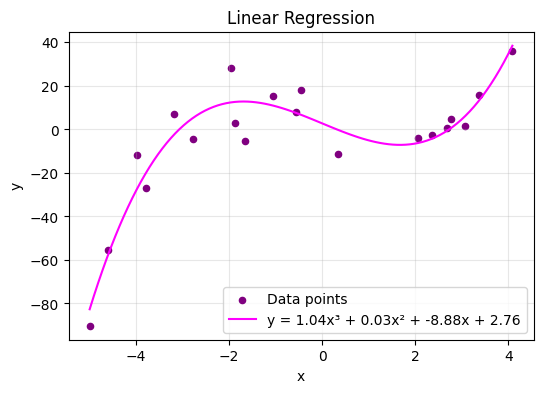

In [38]:
xs = [
    3.38,
    0.35,
    2.07,
    -0.45,
    -0.56,
    -1.06,
    -2.78,
    3.08,
    -3.99,
    -5.00,
    -3.18,
    -1.97,
    2.37,
    -1.67,
    4.09,
    -4.60,
    2.68,
    2.78,
    -3.79,
    -1.87,
]
ys = [
    15.65,
    -11.20,
    -4.00,
    18.03,
    7.94,
    15.32,
    -4.40,
    1.39,
    -11.92,
    -90.24,
    6.92,
    28.35,
    -2.41,
    -5.47,
    35.91,
    -55.53,
    0.77,
    4.79,
    -27.05,
    2.85,
]

a, b, c, d = ajustar_min_cuadrados(
    xs,
    ys,
    gradiente=[der_parcial_a, der_parcial_b, der_parcial_c, der_parcial_d],
)

print(f"a: {a}, b: {b}, c: {c}, d: {d}")

plt.figure(figsize=(6, 4))

plt.scatter(xs, ys, color="purple", label="Data points", s=20)

x_line = np.linspace(min(xs), max(xs), 100)
y_line = a * x_line**3 + b * x_line**2 + c * x_line + d
plt.plot(
    x_line,
    y_line,
    color="#FF00FF",
    label=f"y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()